<h1><center>Яндекс.Недвижимость</center></h1>

## Введение
Исследование объявлений о продаже квартир.

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Алгоритм работы:
 1. Ознакомление с целью исследовательской работы
 2. Обзор данных
 3. Предобработка данных
 4. Посчитаем и добавим в таблицу:
    - цену квадратного метра
    - день недели, месяц и год публикации объявления
    - этаж квартиры (первый, последний, другой)
    - соотношение жилой и общей площади, а также отношение площади кухни к общей.
 5. Проведем исследовательский анализ данных:
    - Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.
    - Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа.
    - Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра.
    - Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
    - Изучим зависимость от даты размещения: дня недели, месяца и года.
    - Выберим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих
	  населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.
    - Изучим предложения квартир. Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры
      в Санкт-Петербурге. Наша задача — выяснить, какая область входит в центр. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу? 
      
      
 6. Сделаем общий вывод.   

## Обзор данных из файла

Импортируем библиотеки и ознакомимся с данными

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

from os import path
from pathlib import Path

In [13]:
YANDEX_DATASETS_PATH = 'https://code.s3.yandex.net/datasets/'
dataset_folder = 'datasets'
dataset_name = 'real_estate_data.csv'

#download dataset if not existed
if not path.exists(dataset_folder + '/' + dataset_name):
    #create dir if not existed
    Path(dataset_folder).mkdir(parents=True, exist_ok=True)

    #download dataset
    urllib.request.urlretrieve(YANDEX_DATASETS_PATH + dataset_name,
                               dataset_folder + '/' + dataset_name)

# Read file

data = pd.read_csv('datasets/real_estate_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

In [14]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Согласно документации:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
*  ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
*  total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Вывод

Пропусков нет, но все данные "смешаны" в одну колонку, надо выполнить разделение по символу табуляции "\t". Дальше посмотрим детально по каждой колонке. 

## Предобработка данных

Сделаем разделение и проверим полученную таблицу

In [15]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

In [16]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Сделаем обзор данных полученной таблицы

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим более детально категориальные элементы. Для нашего исследования нас интересуют:
* floor — этаж
* floor_total — всего этажей
* rooms — число комнат
* locality_name — название населённого пункта

In [18]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

In [19]:
data['floor'].isna().sum()

0

Пропусков нет

In [20]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

In [21]:
data['floors_total'].isna().sum()

86

Имеется небольшое кол-во пропусков. Их не восстановить значениями из данных. Поэтому просто удалим

In [22]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'].isna().sum()

0

Имеет смысл выполнить в расчетах категоризацию этажей на ("первый", "последний", "другой"). Для этого поменяем тип столбца 'floor_total' на целочисленный:

In [23]:
data['floors_total'] = data['floors_total'].astype(int)

In [24]:
data['rooms'].value_counts()

1     8015
2     7913
3     5795
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Имееются нулевые значения. Их немного, скорее всего вызванные опечаткой клиента. Уберем их.

In [25]:
data = data[data['rooms'] != 0]
data['rooms'].value_counts()

1     8015
2     7913
3     5795
4     1177
5      325
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Посмотрим подробно на названия населеных пунктов

In [26]:
data['locality_name'].value_counts().head(40)

Санкт-Петербург              15542
посёлок Мурино                 494
посёлок Шушары                 435
Всеволожск                     392
Пушкин                         369
Колпино                        338
посёлок Парголово              323
Гатчина                        307
деревня Кудрово                283
Выборг                         237
Петергоф                       201
Сестрорецк                     183
Красное Село                   176
Кудрово                        166
деревня Новое Девяткино        142
Сертолово                      139
Ломоносов                      133
Кириши                         125
Сланцы                         112
Волхов                         111
Кингисепп                      104
Тосно                          103
Кронштадт                       96
Коммунар                        89
Никольское                      87
Сосновый Бор                    87
Кировск                         84
Отрадное                        79
посёлок Бугры       

In [27]:
data['locality_name'].isna().sum()

48

Имеется небольшое кол-во пропусков. Скорее всего, вызванное человеским фактором. Удалим их

In [28]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['locality_name'].isna().sum()

0

Проверим числовые значения. Сконвертируем формат столбцов в числовой для дальнейних расчетов и посмотрим пропуски. Нас интересуют:
* cityCenters_nearest — расстояние до центра
* last_price — цена
* total_area — общая площадь
* living_area — жилая площадь
* kitchen_area — площадь кухни
* ceiling_height — высота потолка
* days_exposition — время от публикации до снятия 


In [29]:
data['last_price'].isna().sum()

0

Пропусков нет

In [30]:
data['total_area'].isna().sum()

0

Пропусков нет

In [31]:
data['living_area'].isna().sum()

1854

In [32]:
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


In [33]:
data['kitchen_area'].isna().sum()

2028

In [34]:
data[data['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


In [35]:
data['ceiling_height'].isna().sum()

8972

In [36]:
data[data['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


Имеется большое кол-во пропусков в значениях жилой площади, площади кухни и высоты потолков. Их невозможно восстановить по другим столбцам. Скорее всего вызванных человеческим фактором клиента, разместившем объявление. Не будем их удалять, т.к они несут полезную для анализа информацию по другим полям

In [37]:
data['cityCenters_nearest'].isna().sum()

5424

In [38]:
data[data['cityCenters_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [39]:
data['days_exposition'] = data['days_exposition']
data['days_exposition'].isna().sum()

3157

In [40]:
data[data['days_exposition'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9,30.3,7,NaN,...,7.0,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24,29.7,9,NaN,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


Эти пропуски в полях расстояния до центра и кол-ва дней со дня публикации скорее всего вызваны ошибкой в автоматической системе расчета. Не будем их удалять по тем же причинам

Сделаем правильный формат даты объявления (first_day_exposition), чтобы потом разбить это значения на интересующие нас временные параметры

In [41]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
data['first_day_exposition'].isna().sum()

0

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проверим наличие дупликатов

In [43]:
data.duplicated().sum()

0

Вывод: имеется большое кол-во пропусков в числовых столбцах, которое составляет около 10 до 40 % нашей выборки. Причины скорее всего вызваны человеческим фактором и ошибками в работе системы автоматизации. Небольшое кол-во пустых значений в категориальных переменных были удалены

## Расчёты и добавление результатов в таблицу

Создадим столбец для категоризации этажей

In [44]:
data['floor_group'] = data.apply(lambda x: 'Первый' if x['floor'] == 1 else 'Последний'
                                 if (x['floors_total']==x['floor']) else "Другой", axis=1)

Проверим полученный результат

In [45]:
data['floor_group'].value_counts()

Другой       17161
Последний     3319
Первый        2891
Name: floor_group, dtype: int64

Посчитаем и добавим в таблицу цену квадратного метра

In [46]:
data['price_m2'] = data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,price_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Другой,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Первый,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Другой,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Другой,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Другой,100000.000000


Посчитаем и добавим в таблицу соотношение жилой и общей площади

In [47]:
data['living_total_area'] = data['living_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,price_m2,living_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Другой,120370.370370,0.472222
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Первый,82920.792079,0.460396
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Другой,92785.714286,0.612500
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Другой,408176.100629,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Другой,100000.000000,0.320000


Посчитаем и добавим в таблицу соотношение площади кухни и общей площади

In [48]:
data['kitchen_total_area'] = data['kitchen_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_group,price_m2,living_total_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,Другой,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,Первый,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,Другой,92785.714286,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,Другой,408176.100629,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,Другой,100000.000000,0.320000,0.410000


Добавим в таблицу день недели, месяц и год публикации объявления

In [49]:
data['exposition_day_week'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,floor_group,price_m2,living_total_area,kitchen_total_area,exposition_day_week,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,NaN,Другой,120370.370370,0.472222,0.231481,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,0.0,NaN,81.0,Первый,82920.792079,0.460396,0.272277,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,2.0,574.0,558.0,Другой,92785.714286,0.612500,0.148214,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,3.0,234.0,424.0,Другой,408176.100629,NaN,NaN,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121.0,Другой,100000.000000,0.320000,0.410000,1,6,2018


Вывод: Добавили в таблицу, необходимые для дальнейшего анализа, столбцы. Т.к они опираются на значения переменных, где присутствуют пропущенные значения, в них, соответственно, они тоже будут

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Подберем параметры для гистограмм, чтобы лучше оценить выборку в каждом случае

In [50]:
data['total_area'].describe()

count    23371.000000
mean        60.580161
std         35.613640
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

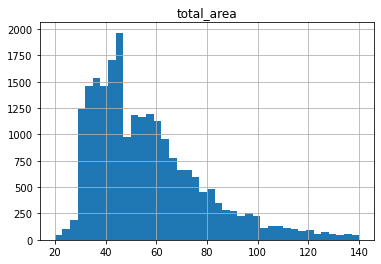

In [51]:
data['total_area'].hist(range=(20, 140), bins=40)
plt.title('total_area')
plt.show()

Средняя площадь варьюруется от 40 до 70 м2

In [52]:
data['last_price'].describe()

count    2.337100e+04
mean     6.566584e+06
std      1.094248e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

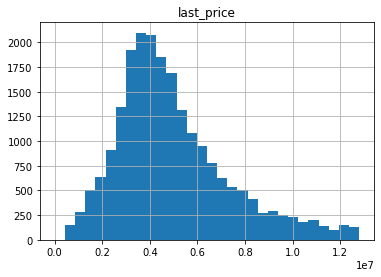

In [53]:
data['last_price'].hist(range=(1.219000e+04, 12.790000e+06), bins=30)
plt.title('last_price')
plt.show()

Средняя цена находится в диапазоне от 3.5 до 7 млн. рублей

In [54]:
data['rooms'].describe()

count    23371.000000
mean         2.087844
std          1.066362
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

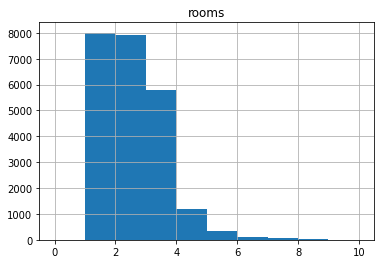

In [55]:
data['rooms'].hist(range=(0, 10), bins=10)
plt.title('rooms')
plt.show()


Большинство квартир находися в диапазоне от 1 до 3-ех комнат

In [56]:
data['ceiling_height'].describe()

count    14399.000000
mean         2.769387
std          1.249022
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

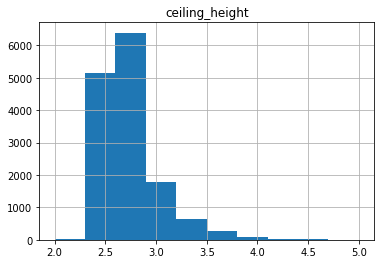

In [57]:
data['ceiling_height'].hist(range=(2, 5), bins=10)
plt.title('ceiling_height')
plt.show()

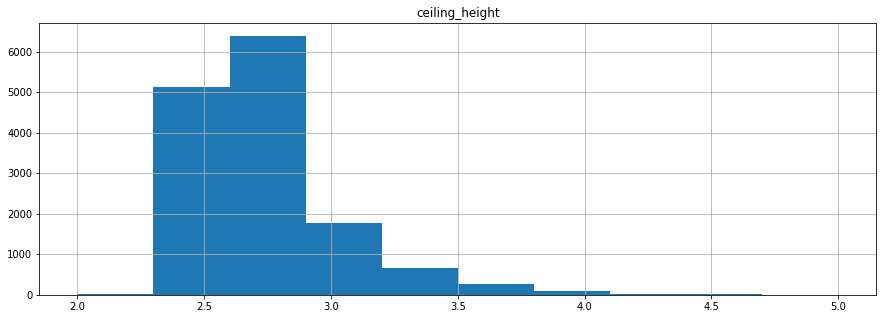

In [58]:
plt.figure(figsize=(15,5))
data['ceiling_height'].hist(range=(2, 5), bins=10)
plt.title('ceiling_height')
plt.show()

In [59]:
plt.gcf().set_size_inches((10, 7))

<Figure size 720x504 with 0 Axes>

Средняя высота составляет от 2.5 до 3ех метров. Вообще-то, минимальная высота потолков в России составляет 2.4 метра. Будем считать объявления меньше этого значения ошибочными и удалим их.

In [60]:
data[(data['ceiling_height'] < 2.4)]['ceiling_height'].count()

21

In [61]:
data = data[~( data['ceiling_height'] < 2.4 )]
data[(data['ceiling_height'] < 2.4)]['ceiling_height'].count()

0

Изучим время продажи квартиры

In [62]:
data['days_exposition'].describe()

count    20196.000000
mean       181.422410
std        220.161579
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

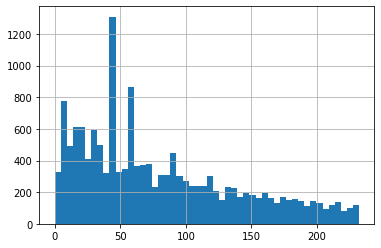

In [63]:
data['days_exposition'].hist(range=(0, 232), bins=50)

Сделаем функцию для оптимизации построения графиков и протестируем ее:

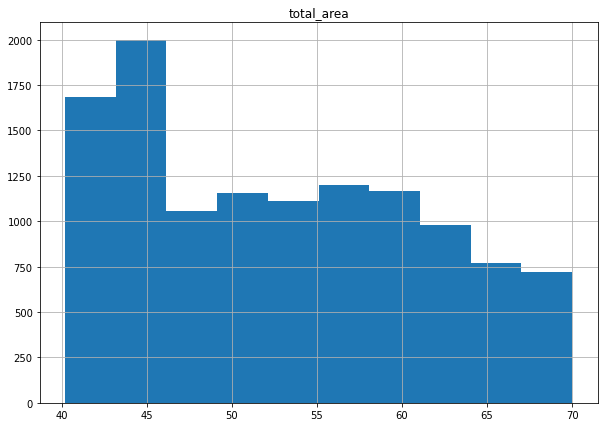

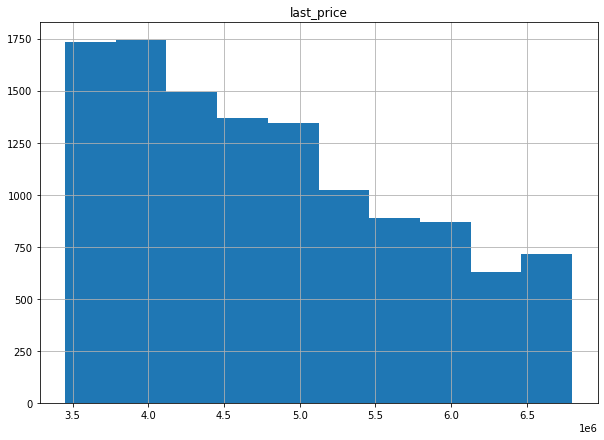

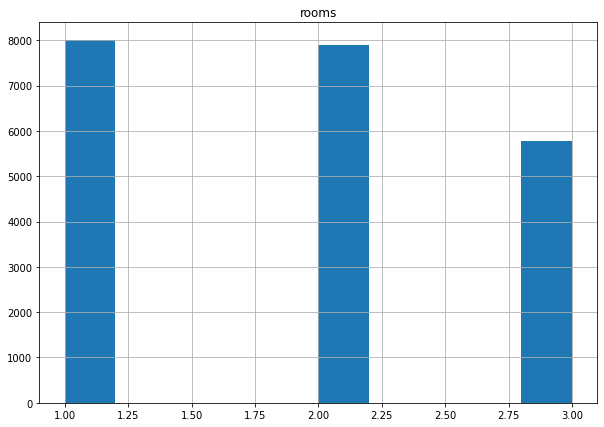

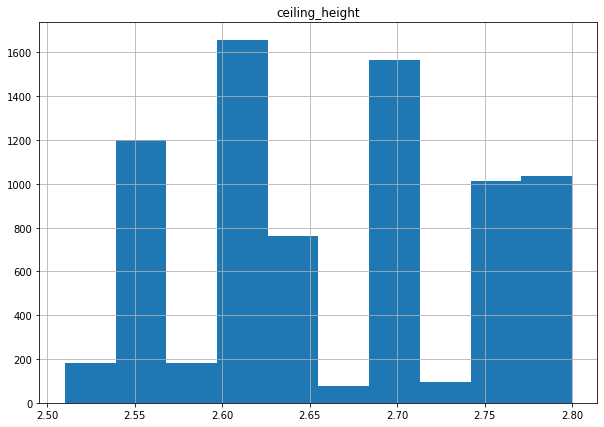

In [64]:
def hist_25_75(param_list, bins):
    for param in param_list:
        data[param].hist(range=(data[param].quantile(0.25) , data[param].quantile(0.75)))
        plt.title(param, fontsize=12)
        plt.gcf().set_size_inches((10, 7))
        plt.show()
        
hist_25_75(['total_area', 'last_price', 'rooms', 'ceiling_height'], bins=50)        

In [65]:
data['days_exposition'].value_counts().head(5)

45.0    864
60.0    534
7.0     228
30.0    202
90.0    199
Name: days_exposition, dtype: int64

Пиковые значения приходятся на 45 и 60 дней. Посмотрим, что происходит на участке быстрых продаж.

<AxesSubplot:>

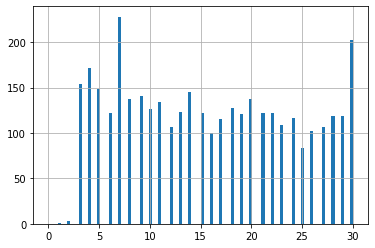

In [66]:
data['days_exposition'].hist(range=(0, 30), bins=100)

Исходя из графика, можно сказать, что аномально быстрые продажи это меньше 3-ех дней. Но ,объективно, скорее всего снятые публикации до 45 дней, это не купленные квартиры, а клиенты, которые сняли объявление по другим причинам.

Посмотрим, что происходит на участке медленных продаж

<AxesSubplot:>

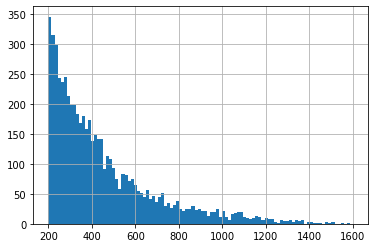

In [67]:
data['days_exposition'].hist(range=(200, 1600), bins=100)

Продажи после 1200 дней встречаются крайне редко, будем считать их необычайно медленными.

Изучим, какие факторы больше всего влияют на стоимость квартиры. Посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

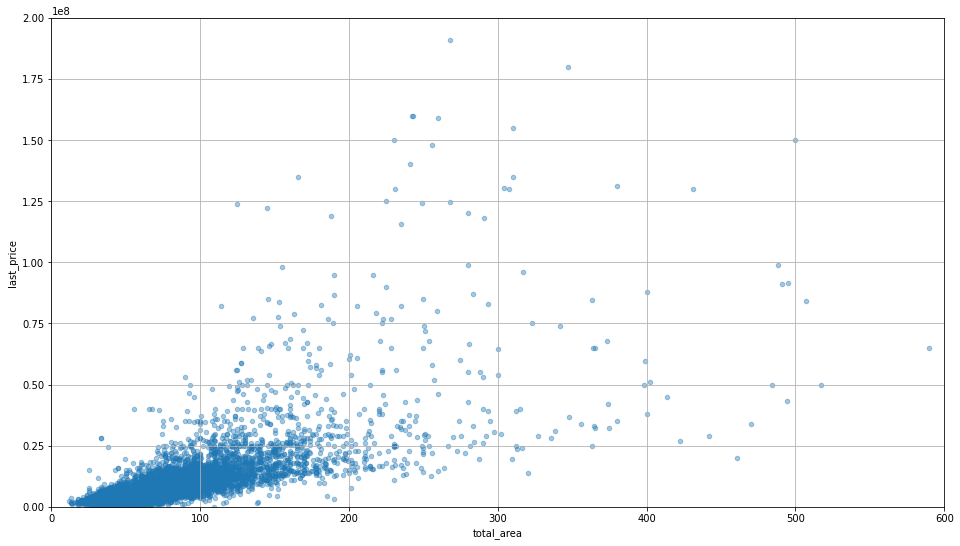

In [68]:
data.plot(kind='scatter', grid=True, x='total_area', y='last_price', alpha=0.4,
          ylim=(0, 2*10e7), xlim=(0,600), figsize=(16, 9))

In [69]:
data[['last_price']].corrwith(data['total_area'])

last_price    0.653035
dtype: float64

Вывод: с увеличением общей площади, цена растет

Большая часть выборки приходится на квартиры с количество комнат меньше 5. Ее и рассмотрим:

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

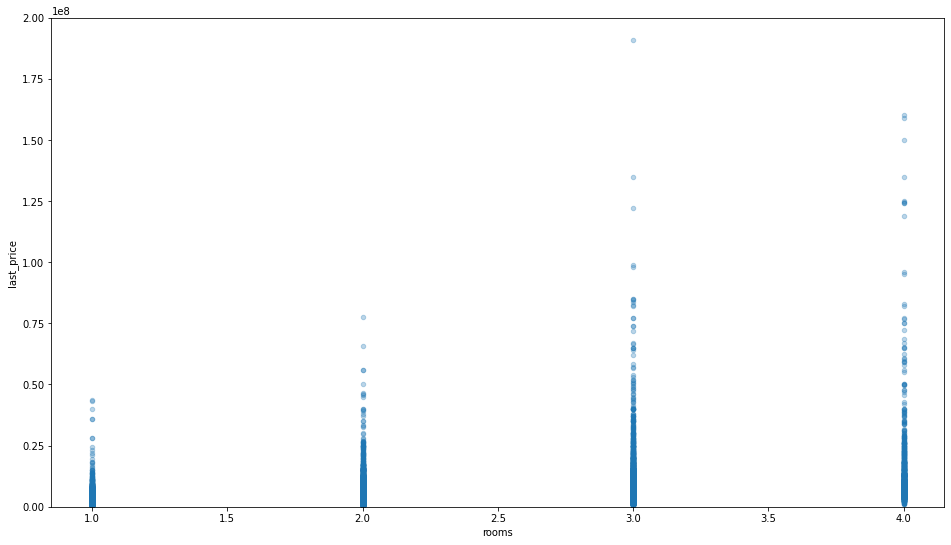

In [70]:
rooms = data[data['rooms'] < 5]
rooms.plot.scatter(x='rooms', y='last_price', ylim=(0, 2*10e7), figsize=(16, 9), alpha=0.3)

In [71]:
rooms.pivot_table(values='last_price', columns='rooms', aggfunc=['mean', 'median'])

mean                                               median  \
rooms                  1             2             3             4          1   
last_price  3.835120e+06  5.589755e+06  8.179068e+06  1.341792e+07  3600000.0   

                                             
rooms               2          3          4  
last_price  4770000.0  6200000.0  9000000.0

In [72]:
data[['last_price']].corrwith(data['rooms'])

last_price    0.36463
dtype: float64

Вывод: цена растет с увеличением числа комнат

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

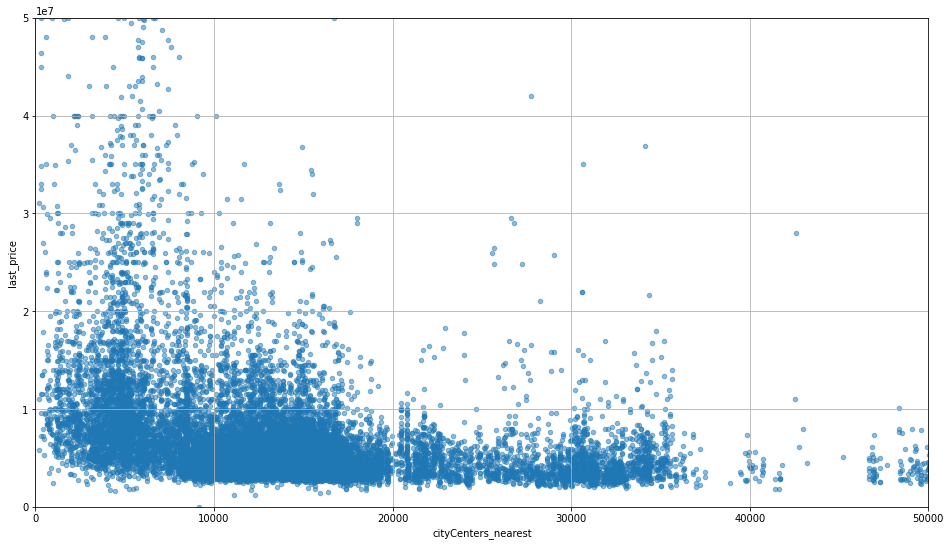

In [73]:
data.plot(kind='scatter', grid=True, x='cityCenters_nearest', y='last_price',
          ylim=(0, 0.5*10e7), xlim=(0, 50000), alpha=0.5, figsize=(16, 9))

In [74]:
data[['last_price']].corrwith(data['cityCenters_nearest'])

last_price   -0.206512
dtype: float64

Вывод: цена растет при приближении к центру 

In [75]:
data.corr()["last_price"]

total_images           0.104637
last_price             1.000000
total_area             0.653035
rooms                  0.364630
ceiling_height         0.086556
floors_total          -0.004129
living_area            0.565934
floor                  0.028493
studio                -0.007495
open_plan              0.007271
kitchen_area           0.520295
balcony                0.031544
airports_nearest      -0.026964
cityCenters_nearest   -0.206512
parks_around3000       0.150975
parks_nearest         -0.016692
ponds_around3000       0.161509
ponds_nearest         -0.086416
days_exposition        0.080271
price_m2               0.738447
living_total_area      0.005989
kitchen_total_area    -0.089088
exposition_day_week    0.001511
exposition_month       0.003261
exposition_year       -0.042905
Name: last_price, dtype: float64

Посмотрим, зависит ли цена от категории этажа ("Первый, Последний, Другой"). Для этого возьмем выборку, ограниченную по цене, чтобы избежать влияния артефактных значений

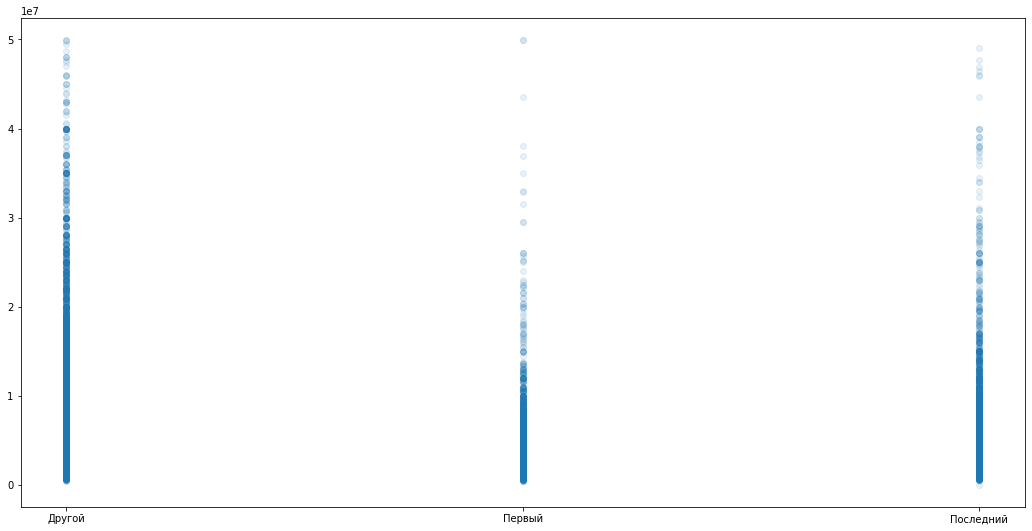

In [76]:
plt.scatter(data[data['last_price'] < 0.5*10e7]['floor_group'],
            data[data['last_price'] < 0.5*10e7]['last_price'],
            alpha = 0.1,)
plt.gcf().set_size_inches((18, 9))    
plt.show()

Посчитаем средние значения и построим график

<AxesSubplot:xlabel='floor_group'>

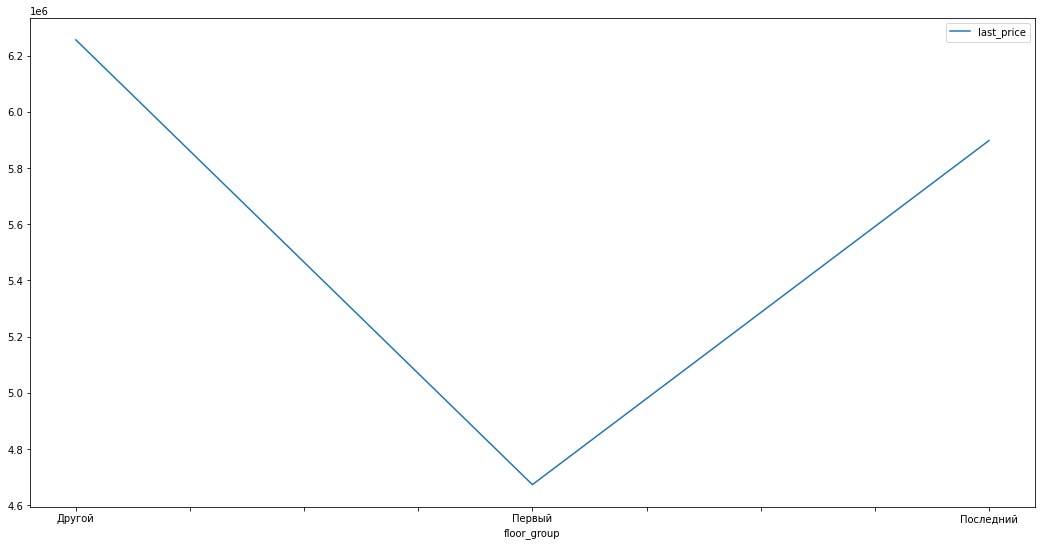

In [77]:
data[data['last_price'] < 0.5*10e7].pivot_table(values='last_price', index='floor_group').plot(figsize=(18,9))

Вывод: Можно сказать, что на первом этаже квартиры самые дешевые. На последнем дороже, чем на первом, но дешевле, чем на этажах между.
- Другой > Последний > Первый

Изучим зависимость цены от даты размещения: дня недели, месяца и года

Рассмотрим зависимость от дня недели:

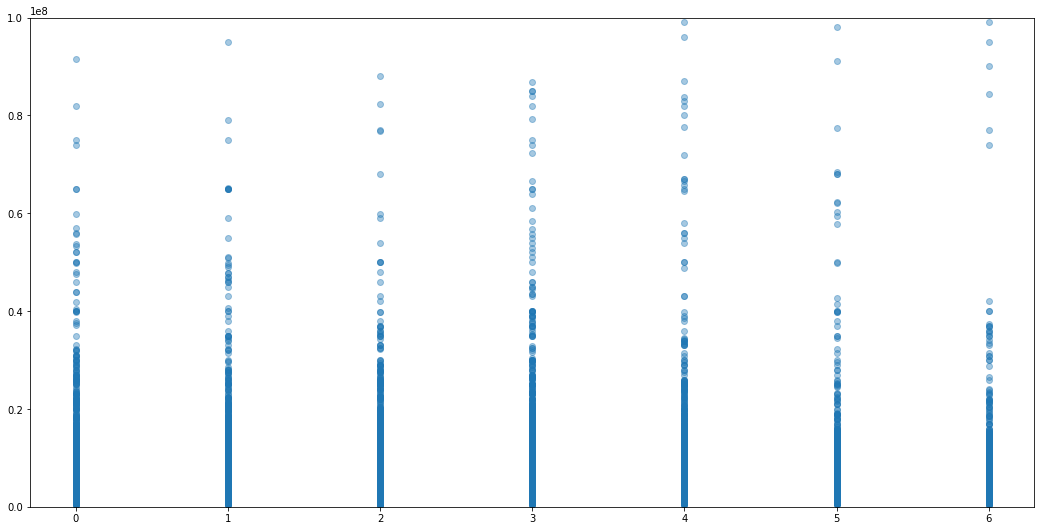

In [78]:
plt.scatter(data['exposition_day_week'],
            data['last_price'],
            alpha = 0.4)
plt.gcf().set_size_inches((18, 9)) 
plt.ylim(0, 1*10e7)
plt.show()

Посчитаем средние значения и построим график

<AxesSubplot:xlabel='exposition_day_week'>

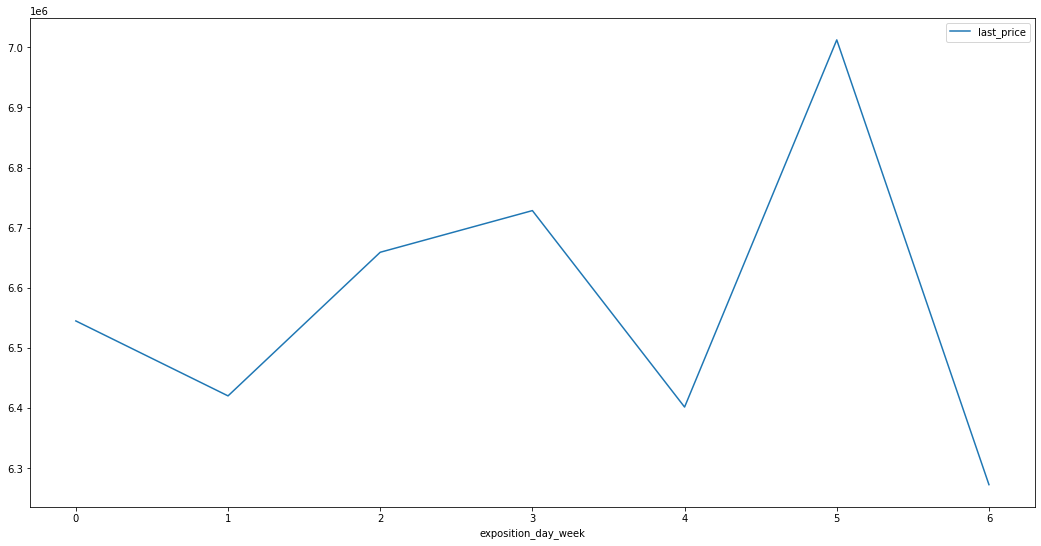

In [79]:
data.pivot_table(values='last_price', index='exposition_day_week').plot(figsize=(18,9))

Вывод: цена не сильно зависит от дня недели. Наибольшие значения - суббота, минимальные - воскресение

Рассмотрим зависимость от месяца:

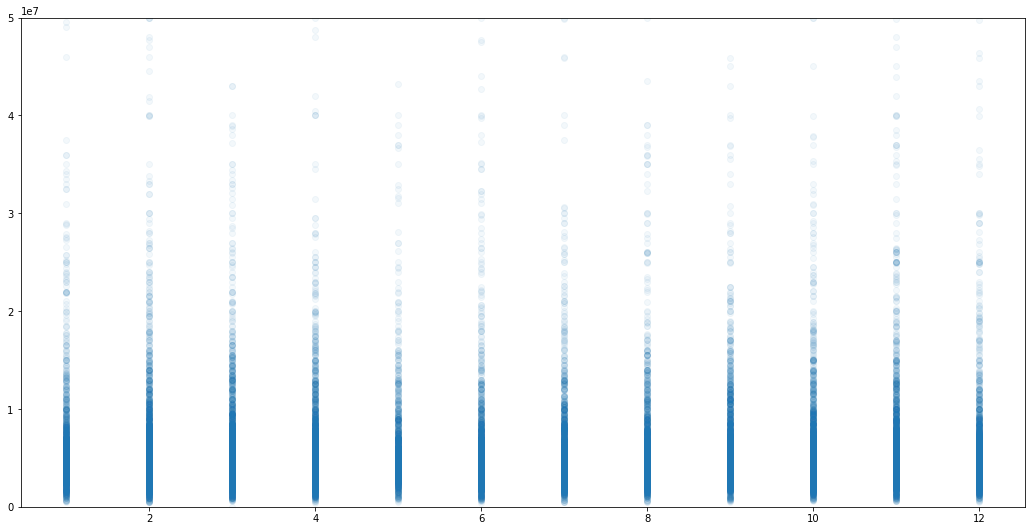

In [80]:
plt.scatter(data['exposition_month'],
            data['last_price'],
            alpha = 0.05)
plt.gcf().set_size_inches((18, 9))  
plt.ylim(0, 0.5*10e7)
plt.show()

Посчитаем средние значения и построим график

<AxesSubplot:xlabel='exposition_month'>

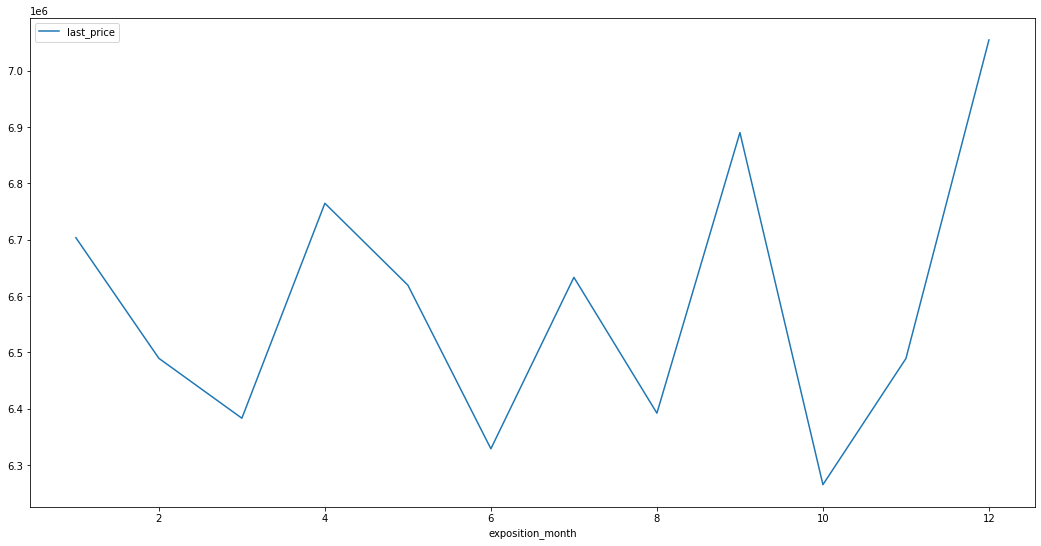

In [81]:
data.pivot_table(values='last_price', index='exposition_month').plot(figsize=(18,9))

Вывод: Цена имеет спад в марте, июне, августе и октябре. И рост в апреле, июле, сентябре и декабре

Рассмотрим зависимость от года размещения:

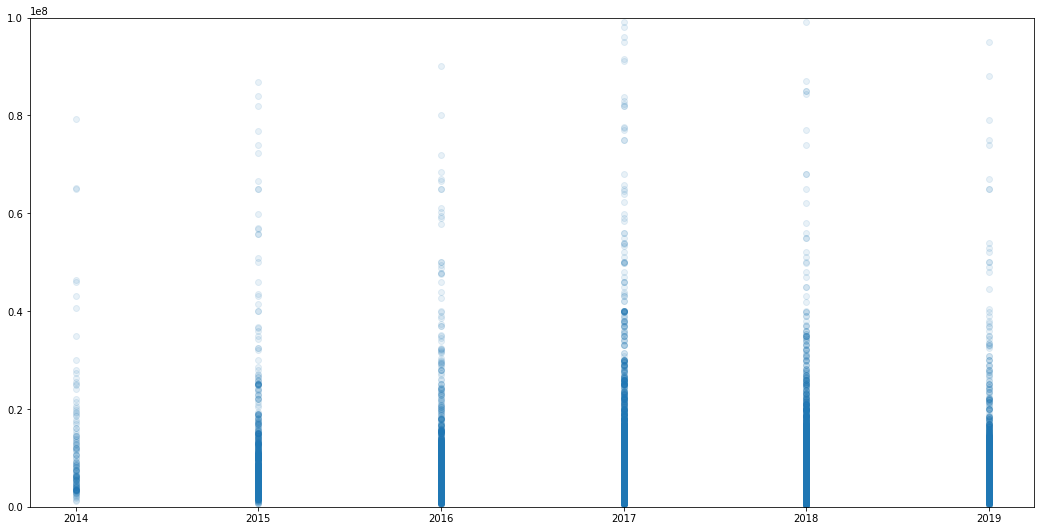

In [82]:
plt.scatter(data['exposition_year'],
            data['last_price'],
            alpha = 0.1)
plt.gcf().set_size_inches((18, 9))  
plt.ylim(0, 1*10e7)
plt.show()

<AxesSubplot:xlabel='exposition_year'>

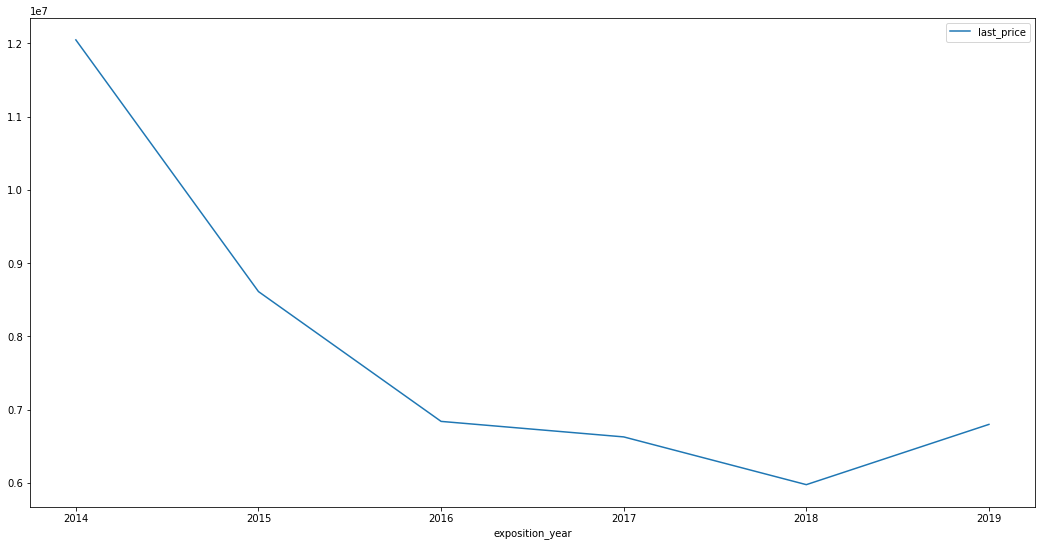

In [83]:
data.pivot_table(values='last_price', index='exposition_year').plot(figsize=(18,9))

Вывод: средняя цена постепенно снижалась к 2018 году. В 2019 году был небольшой рост

Выберим 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих
населённых пунктах

In [84]:
top10 = data['locality_name'].value_counts().head(10).index
data_top10 = data[data['locality_name'].isin(top10)]

In [85]:
data_top10.pivot_table(values='price_m2', index='locality_name').sort_values(by='price_m2')

,price_m2
locality_name,
Выборг,58238.143141
Всеволожск,68683.761963
Гатчина,68746.146763
Колпино,75424.579098
посёлок Шушары,78277.935520
посёлок Мурино,85036.645789
посёлок Парголово,90289.778393
деревня Кудрово,92297.218847
Пушкин,103125.819291


Вывод: Из топ 10, Выборг и Санкт-Петербург это регионы с самой низкой и самой высокой стоимостью жилья соответственно

Выделим квартиры в Санкт-Петербурге и создадим столбец с расстояниям до центра в км

In [86]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest']/1000).round()
data_spb.head()

C:\Users\Lampq\AppData\Local\Temp\ipykernel_14144\2974888032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest']/1000).round()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_group,price_m2,living_total_area,kitchen_total_area,exposition_day_week,exposition_month,exposition_year,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,755.0,NaN,Другой,120370.370370,0.472222,0.231481,3,3,2019,16.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,574.0,558.0,Другой,92785.714286,0.612500,0.148214,3,8,2015,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,234.0,424.0,Другой,408176.100629,NaN,NaN,4,7,2015,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,48.0,121.0,Другой,100000.000000,0.320000,0.410000,1,6,2018,8.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,NaN,NaN,Другой,110544.692737,NaN,0.263966,3,4,2019,12.0


Посчитаем среднюю цену каждого км

In [87]:
data_spb.pivot_table(values='last_price', index='cityCenters_nearest_km')

,last_price
cityCenters_nearest_km,
0.0,3.144912e+07
1.0,2.127482e+07
2.0,1.788662e+07
3.0,1.116056e+07
4.0,1.332048e+07
5.0,1.448752e+07
6.0,1.532842e+07
7.0,1.483023e+07
8.0,1.000520e+07


Построим график

<AxesSubplot:xlabel='cityCenters_nearest_km'>

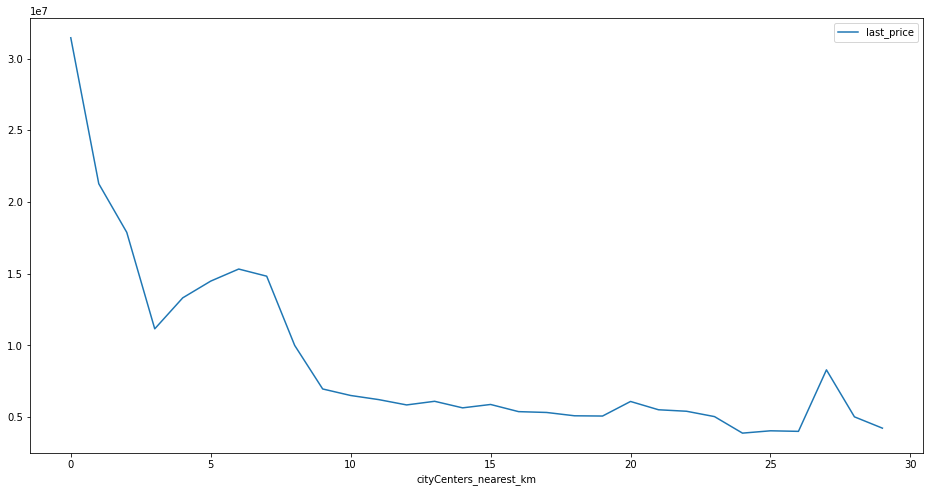

In [88]:
data_spb.pivot_table(values='last_price', index='cityCenters_nearest_km').plot(figsize=(16, 8))

Начиная с 9 км, скорость изменения цены резко замедляется. Предположим, что все значения в радиусе 8 км являются центром. Посмотрим эти объявления и изучим следующие параметры: площадь, цена,
	число комнат, высота потолков. Сравним их со значениями по всему городу

In [89]:
data_spb["cityCenters_nearest_km"].describe()

count    15477.000000
mean        11.574271
std          4.855031
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: cityCenters_nearest_km, dtype: float64

In [90]:
data_spb["cityCenters_nearest_km"].mode()

0    12.0
Name: cityCenters_nearest_km, dtype: float64

In [91]:
data_center = data_spb[data_spb['cityCenters_nearest_km'] < 9]
center_info = data_center[[ 'total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

In [92]:
spb_info = data_spb[[ 'total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

In [93]:
spb_info - center_info

,total_area,last_price,rooms,ceiling_height
count,11449.000000,1.144900e+04,11449.000000,7367.000000
mean,-25.496433,-6.118499e+06,-0.585004,-0.326898
std,-18.332878,-1.057822e+07,-0.277946,-0.828019
min,0.000000,-1.587810e+06,0.000000,0.000000
25%,-13.000000,-2.270000e+06,-1.000000,-0.250000
50%,-21.000000,-3.438706e+06,-1.000000,-0.300000
75%,-32.000000,-5.700000e+06,0.000000,-0.380000
max,0.000000,0.000000e+00,0.000000,0.000000


Вывод: Объявления в центре в среднем выше в цене, большей площади, в них больше комнат и в них выше потолки

Сравним число комнат, этаж и дату размещения объявления для центра и для всего города в целом. Для этого будем делать сборные таблички, а по ним строить графики, где синей линией будут отображаться значения для центра, а оранжевой - для всего города

Посмотрим на изменение цены в зависимости от кол-ва комнат(возьмем выборку до 10 комнат):

<AxesSubplot:xlabel='rooms'>

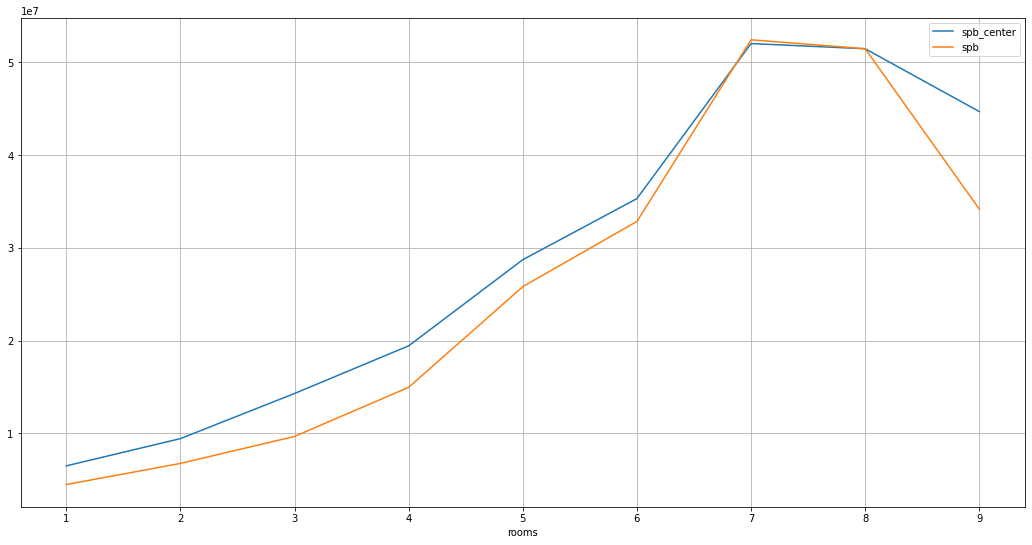

In [94]:
pivot_data = pd.concat([ data_center[data_center['rooms'] < 10].pivot_table(values='last_price', index='rooms'),
           data_spb[data_spb['rooms'] < 10].pivot_table(values='last_price', index='rooms')],
           axis=1)
pivot_data.columns = ['spb_center', 'spb']
pivot_data.plot(grid=True, figsize=(18, 9))

Вывод: цена растет с увеличением кол-ва комнат для обеих выборок

Посмотрим на изменение цены в зависимости от этажа:

<AxesSubplot:xlabel='floor_group'>

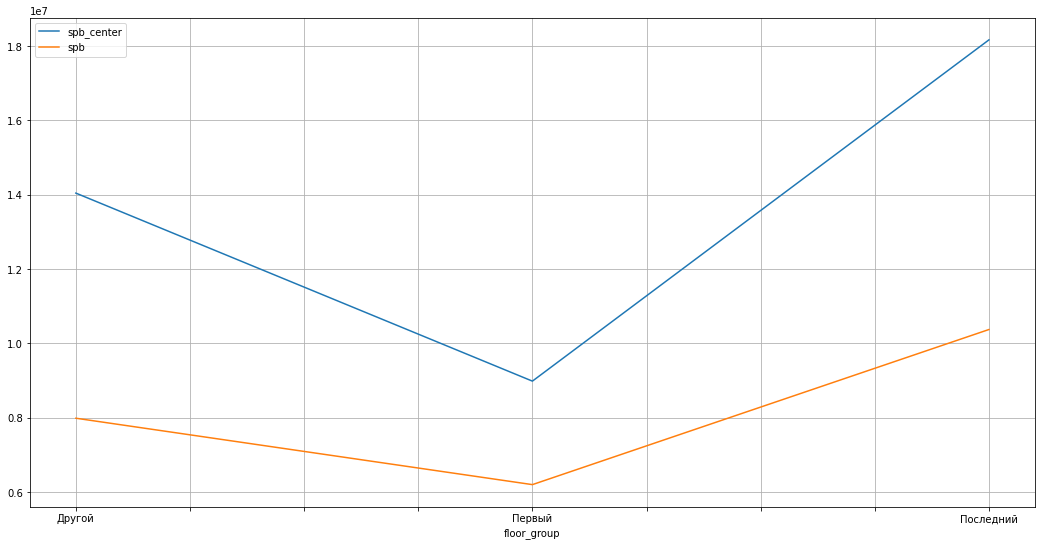

In [95]:
pivot_data = pd.concat([data_center.pivot_table(values='last_price', index='floor_group'),
           data_spb.pivot_table(values='last_price', index='floor_group')],
           axis=1)
pivot_data.columns = ['spb_center', 'spb']
pivot_data.plot(grid=True, figsize=(18, 9))

Вывод: В среднем, для обеих выборок существует следующее соотношение цены от этажа: Последний > Другой > Первый

Посмотрим на изменение цены в зависимости от года размещения:

<AxesSubplot:xlabel='exposition_year'>

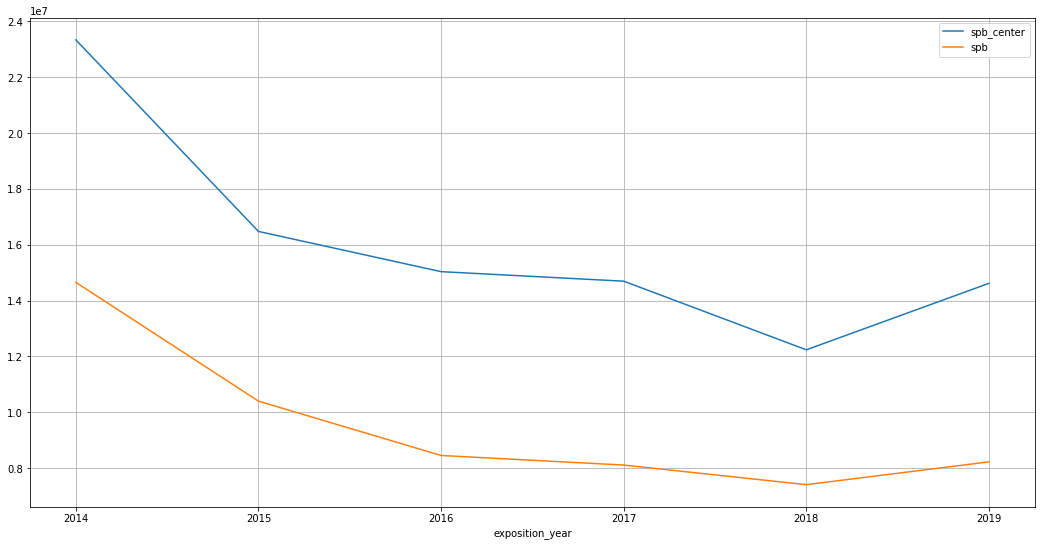

In [96]:
pivot_data = pd.concat([data_center.pivot_table(values='last_price', index='exposition_year'),
           data_spb.pivot_table(values='last_price', index='exposition_year')],
           axis=1)
pivot_data.columns = ['spb_center', 'spb']
pivot_data.plot(grid=True, figsize=(18, 9))

Вывод: для обеих выборок цена падала до 2018 года. Потом, небольшой рост в 2019.

Посмотрим на изменение цены в зависимости от месяца:

<AxesSubplot:xlabel='exposition_month'>

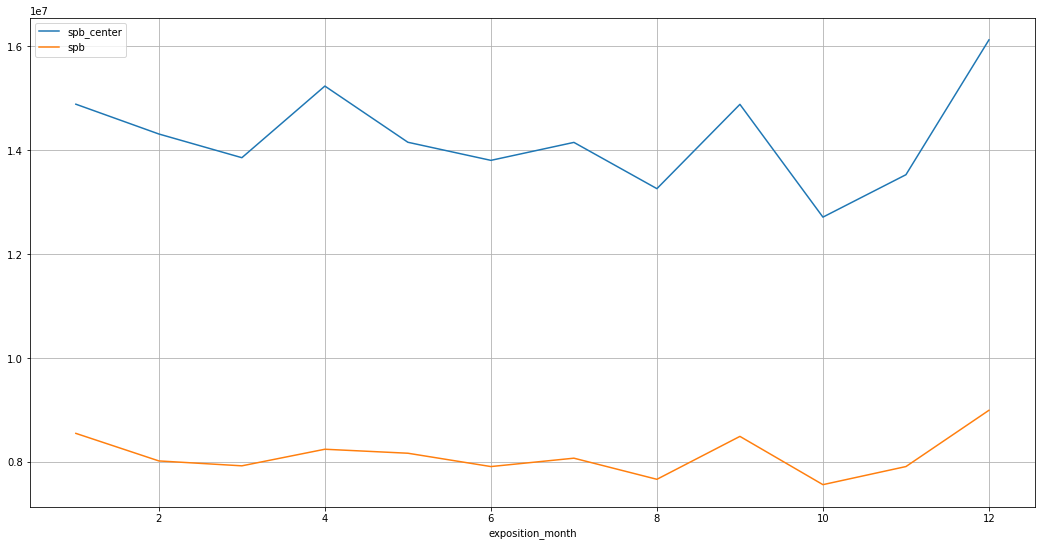

In [97]:
pivot_data = pd.concat([data_center.pivot_table(values='last_price', index='exposition_month'),
           data_spb.pivot_table(values='last_price', index='exposition_month')],
           axis=1)
pivot_data.columns = ['spb_center', 'spb']
pivot_data.plot(grid=True, figsize=(18, 9))

Вывод: для обеих выборок наивысшие значения приходятся на декабрь. В целом цена не сильно зависит от месяца

Посмотрим на изменение цены в зависимости от дня недели:

<AxesSubplot:xlabel='exposition_day_week'>

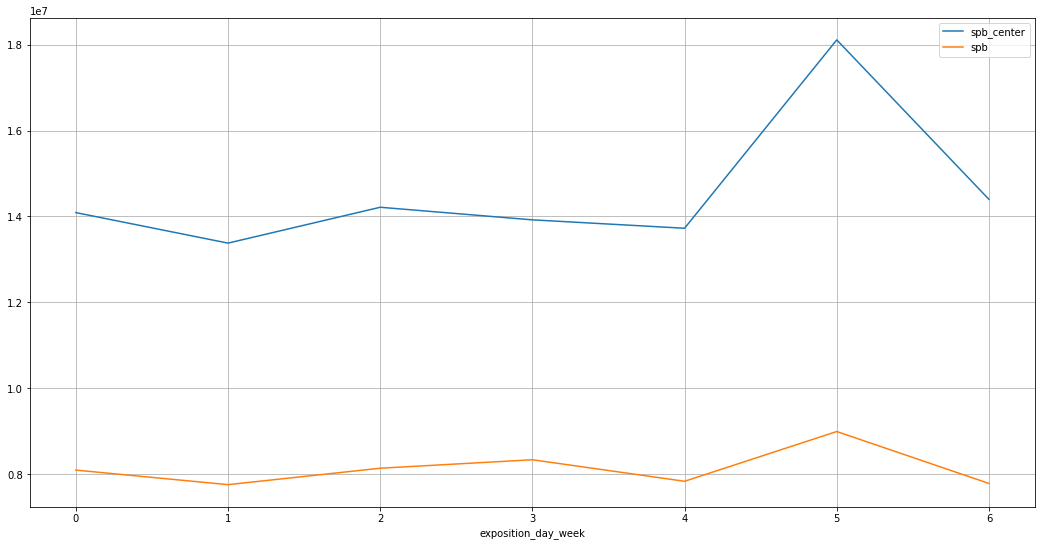

In [98]:
pivot_data = pd.concat([data_center.pivot_table(values='last_price', index='exposition_day_week'),
           data_spb.pivot_table(values='last_price', index='exposition_day_week')],
           axis=1)
pivot_data.columns = ['spb_center', 'spb']
pivot_data.plot(grid=True, figsize=(18, 9))

Вывод: для обеих выборок наивысшие значения приходятся на субботу. В целом цена не сильно зависит от дня недели

Итоги:
 - Цена на квартиры растет с увеличением числа комнат, общей площади, высоты потолков и приближении к центру.
 - Квартиры на первом и последнем этаже самые дешевые. 
 - Среднее время продажи квартир составляет от 45 до 230 дней.
 - Цены снижались от 2014 до 2018 года. Имеются спады в марте, июне, августе и октябре. И рост в апреле, июле, сентябре и декабре. Не зависят от дня недели.
 - Область радиусом в 8 км2 вокруг центра можно считать в Санкт-Петербурге центральной - там наблюдается резкий рост стоимости жилья
 - Поведения цены для центра и для города в целом имеет один и тот же характер для каждого из параметров

## Общий вывод

Мы ознакомились с архивом о продаже квартир в Санкт-Петербурге и соседних регионах за несколько последних лет. В выборке присутствовало большое кол-во количество пропусков, связанных ,скорее всего, как с человеческим фактором - это поля жилой и  кухонной площади, а также высота потолков, так и с ошибками в системе автоматизированного расчета - это поля расстояния до центра и количества дней со дня публикации. Имелось небольшое кол-во нулевых значений, которые пришлось удалить. Далее, мы установили параметры, которые влияют на стоимость жилья. Они вполне интуитивно понятны, при увеличении кол-ва комнат, площади жилья, высоты потолков - стоимость растет. Квартиры на первом и последних этажах стоят в среднем дешевле. Стоимость жилья практически не зависит от месяца и дня размещения, за исключением небольшого увеличение в декабре, по-видимому вызванного новогодними празниками. Начиная с 2014 года наблюдается снижение цен до 2018, затем идет небольшой подъем. Мы рассмотрели квартиры, расположенные в центре и выяснили, что объявления в центре в среднем выше в цене, большей площади, в них больше комнат и в них выше потолки. Хотя характер зависимости цен практически идентичен общему по городу.

Рекомендации:
* пересмотр системы ввода, запрещающей\ограничевающей нулевые значения для переменной кол-ва комнат и имени населенного пункта.
* разобраться в причине возникновения нулевых значений в системе автоматизации.